importing the dependencies

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


Data selection and preprocessing
  loading the csv data to pandas dataframe

In [36]:
data=pd.read_csv(r'C:\Users\OMEN\Downloads\heart.csv')

In [37]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


cheack no of rows and coloums in the data

In [38]:
data.shape

(1025, 14)

getting some info about the data

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [40]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

getting some statical data of data

In [41]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


cheacking the distribution of the target variable

In [42]:
data['target'].describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

C:\Users\OMEN\AppData\Local\Temp\ipykernel_4996\2904378938.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=data, palette="Set2")


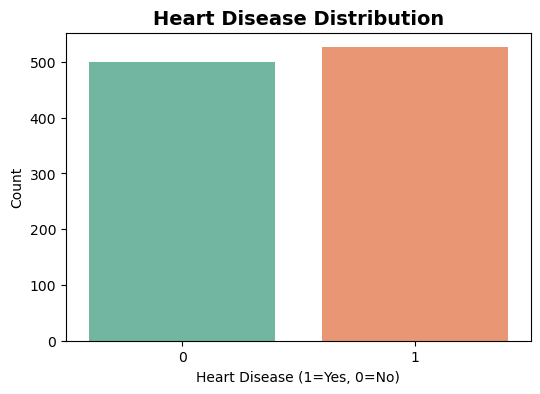

C:\Users\OMEN\AppData\Local\Temp\ipykernel_4996\2904378938.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y="age", data=data, palette="Set1")


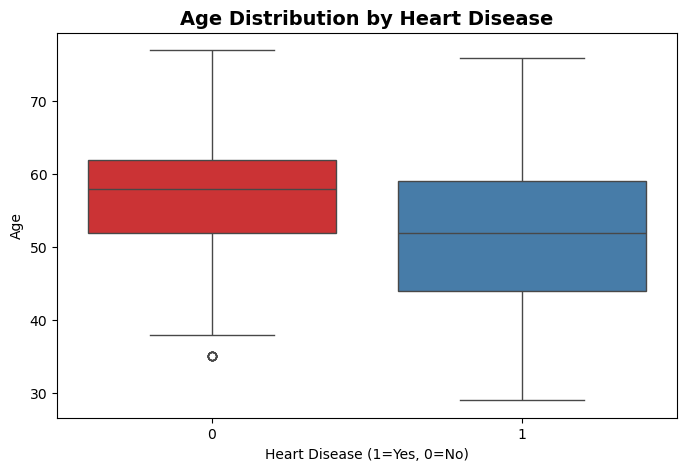

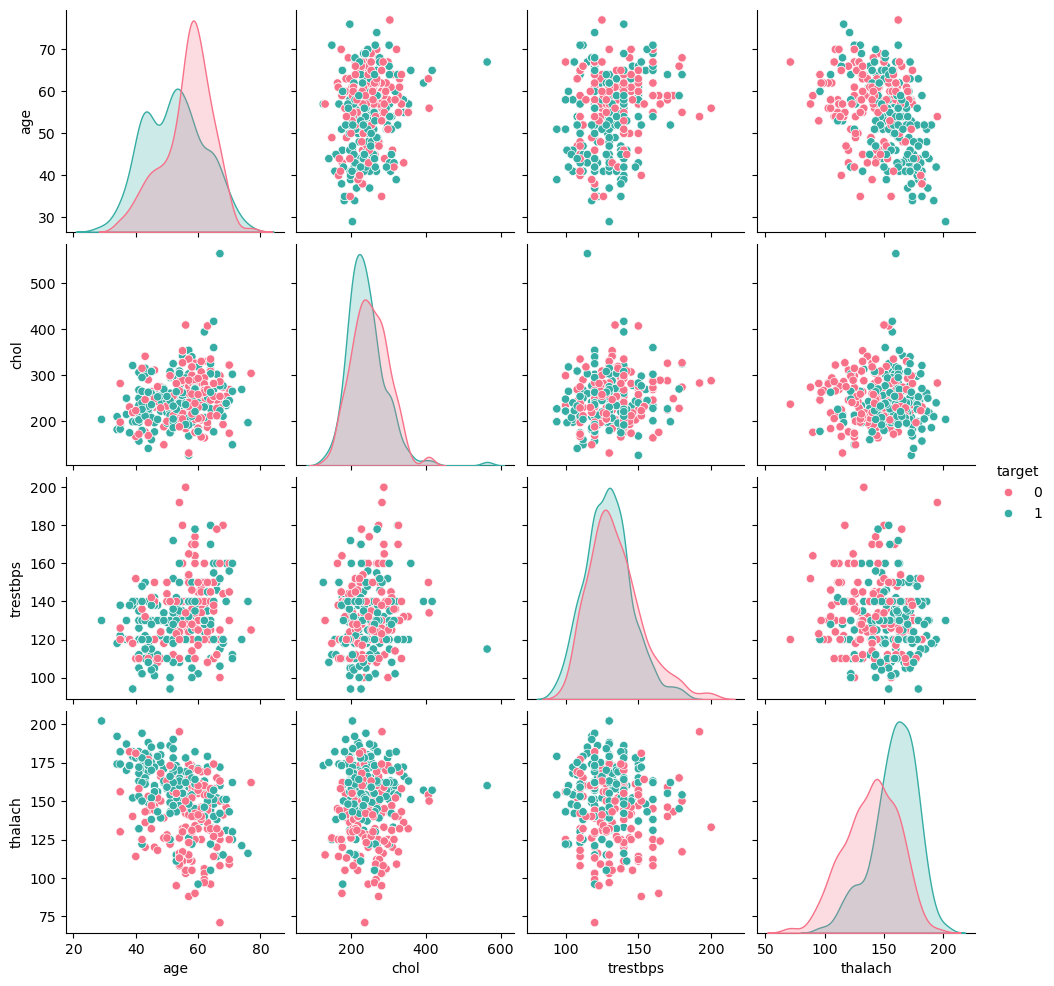

In [45]:
data['target'].value_counts()  

plt.figure(figsize=(6,4))
sns.countplot(x="target", data=data, palette="Set2")
plt.title("Heart Disease Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Heart Disease (1=Yes, 0=No)")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="target", y="age", data=data, palette="Set1")
plt.title("Age Distribution by Heart Disease", fontsize=14, fontweight="bold")
plt.xlabel("Heart Disease (1=Yes, 0=No)")
plt.ylabel("Age")
plt.show()

sns.pairplot(data[["age", "chol", "trestbps", "thalach", "target"]], hue="target", palette="husl")
plt.show()


1-->defective heart
2-->healthy heart
note- the data needs to be distributed evenly inside the dataset there should not be too much difference bw the neg and pos values

splitting the features and target

In [17]:
x=data.drop(columns='target',axis=1)
y=data['target']

In [19]:
print(x)

      age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0      52    1   0       125   212  ...      0      1.0      2   2     3
1      53    1   0       140   203  ...      1      3.1      0   0     3
2      70    1   0       145   174  ...      1      2.6      0   0     3
3      61    1   0       148   203  ...      0      0.0      2   1     3
4      62    0   0       138   294  ...      0      1.9      1   3     2
...   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
1020   59    1   1       140   221  ...      1      0.0      2   0     2
1021   60    1   0       125   258  ...      1      2.8      1   1     3
1022   47    1   0       110   275  ...      1      1.0      1   1     2
1023   50    0   0       110   254  ...      0      0.0      2   0     2
1024   54    1   0       120   188  ...      0      1.4      1   1     3

[1025 rows x 13 columns]


training test splitting

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2,stratify=y)

In [22]:
print(x.shape,xtrain.shape,xtest.shape)

(1025, 13) (820, 13) (205, 13)


traing the model

In [23]:
model=LogisticRegression()
#training the model with training data
model.fit(xtrain,ytrain)
#what exactly happens heres is that the model tries to find the best possible way to map the relationship bw the features and the target it finds the relationship between the features and target

c:\Users\OMEN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

model evaluation
Accuracy score

In [25]:
#accuracy on training data
xtrainprediction=model.predict(xtrain)
trainingaccu=accuracy_score(xtrainprediction,ytrain)
print('accuracy on training data:',trainingaccu)

accuracy on training data: 0.8524390243902439


accuracy on testing data

In [26]:
xtestprediction=model.predict(xtest)

In [27]:
testaccu=accuracy_score(xtestprediction,ytest)

In [29]:
print("the testdata accuracy is:",testaccu)

the testdata accuracy is: 0.8048780487804879


In [ ]:
#not overfitted not underfitted as we can see that there is not a very huge diff bw training and testing accuracy score


building the predictive system

In [32]:
inputdata=(63,1,3,145,233,1,0,150,0,2.3,0,0,1)
#changing the input data to numpy array
inputdataarray=np.asarray(inputdata)
print(inputdataarray)
#reshape the array as we are predicting for one data point
reshapedinputdata=inputdataarray.reshape(1,-1)
print(reshapedinputdata)

[ 63.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   0.    0.
   1. ]
[[ 63.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   0.    0.
    1. ]]


In [34]:
prediction=model.predict(reshapedinputdata)
if(prediction[0]==0):
    print("the person is not having heart disease")
else:
    print("the person is having heart disease")

the person is having heart disease


c:\Users\OMEN\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
